In [151]:
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas.tools.rplot as rplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

Populating the interactive namespace from numpy and matplotlib


In [152]:
dftrain = pd.read_csv("/Users/mayteecheverry/Desktop/Crime/train.csv")
dftest = pd.read_csv("/Users/mayteecheverry/Desktop/Crime/test.csv")

In [153]:
#Eliminamos Resolution debido a la cantidad de datos nulos
#dftrain[dftrain.Resolution =='NONE']
#dftrain.head()
#dftrain.Resolution.value_counts()


In [154]:
dftrain = dftrain.drop(['Descript', 'Resolution', 'Address'], axis = 1)
dftest = dftest.drop(['Address'], axis = 1)

In [155]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878049 entries, 0 to 878048
Data columns (total 6 columns):
Dates         878049 non-null object
Category      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(4)
memory usage: 46.9+ MB


In [156]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884262 entries, 0 to 884261
Data columns (total 6 columns):
Id            884262 non-null int64
Dates         884262 non-null object
DayOfWeek     884262 non-null object
PdDistrict    884262 non-null object
X             884262 non-null float64
Y             884262 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 47.2+ MB


In [157]:
dftrain.head()

,Dates,Category,DayOfWeek,PdDistrict,X,Y
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,-122.438738,37.771541


In [158]:
dftest.head()

,Id,Dates,DayOfWeek,PdDistrict,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,-122.437394,37.721412


In [159]:
dftrain.shape

(878049, 6)

In [160]:
dftest.shape

(884262, 6)

In [161]:
dftrain.Category.value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [162]:
dftrain.Category.value_counts().sum()
#dftrain.Category.value_counts().mean()

878049

In [163]:
#category = dftrain.pop("Category")
#category.describe()

In [164]:
#district = dftrain.pop("PdDistrict")
#district.describe()

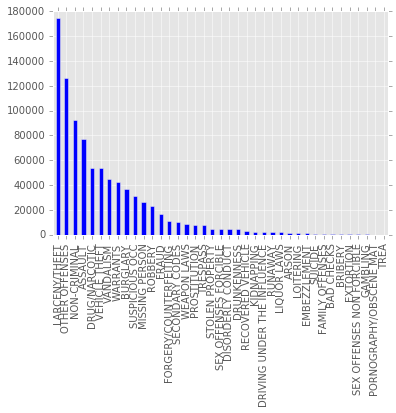

In [165]:
dftrain.Category.value_counts().plot(kind = 'bar')

In [166]:
#total suicidios en distrito
dftrain[(dftrain.Category =='SUICIDE') & (dftrain.PdDistrict =='SOUTHERN')].PdDistrict.value_counts()

SOUTHERN    59
Name: PdDistrict, dtype: int64

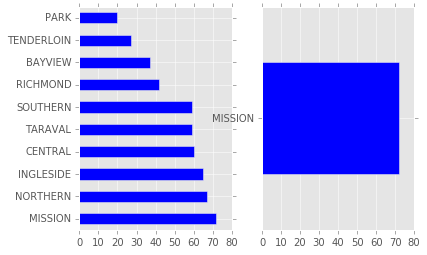

In [167]:
fig, axs = plt.subplots(1,2)
dftrain[(dftrain.Category =='SUICIDE') ].PdDistrict.value_counts().plot(kind ='barh',ax=axs[0],title = '')
dftrain[(dftrain.Category =='SUICIDE') & (dftrain.PdDistrict =='MISSION')].PdDistrict.value_counts().plot(kind ='barh',ax=axs[1],title = '')

In [168]:
#cantidad total delitos por distrito
dftrain.PdDistrict.value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

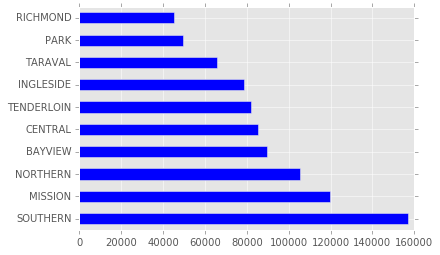

In [169]:
#diagrama de barras de delitos por distritos
dftrain.PdDistrict.value_counts().plot(kind = 'barh')

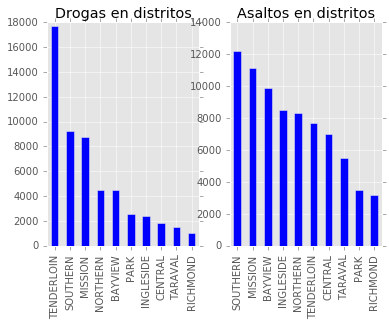

In [170]:
fig, axs = plt.subplots(1,2)
dftrain[dftrain.Category == 'DRUG/NARCOTIC'].PdDistrict.value_counts().plot(kind = 'bar',ax=axs[0],title = 'Drogas en distritos')
dftrain[dftrain.Category == 'ASSAULT'].PdDistrict.value_counts().plot(kind = 'bar',ax=axs[1],title = 'Asaltos en distritos')

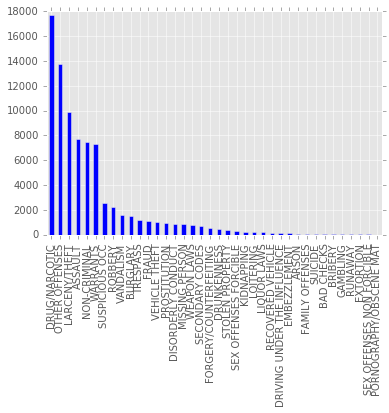

In [171]:
dftrain[dftrain.PdDistrict == 'TENDERLOIN'].Category.value_counts().plot(kind = 'bar')

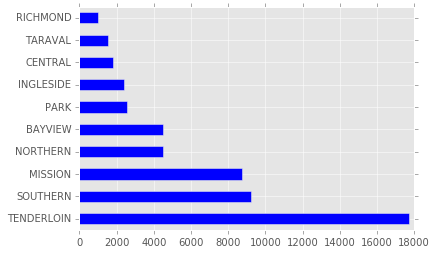

In [172]:
dftrain[dftrain.Category == 'DRUG/NARCOTIC'].PdDistrict.value_counts().plot(kind = 'barh')

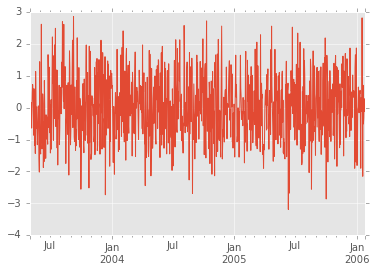

In [173]:
#linea temporal del mes puntero en delitos de los 3 primeros años
ts = pd.Series(np.random.randn(1000), index=pd.date_range('2003-05-02', periods=1000))
ts.cumsum()
ts.plot()

In [ ]:
#Comparo lineas temporales de los 3 primeros años en mes con mayor delitos
dftrainL = pd.DataFrame(np.random.randn(1000, 3), index=ts.index, columns=list('ABC'))
dftrainL = dftrain.cumsum()
plt.figure();
dftrainL.plot();

In [ ]:
#linea temporal del mes puntero en delitos de los 3 primeros años
ts = pd.Series(np.random.randn(4800), index=pd.date_range('2003-01', periods=4800))
ts.cumsum()
ts.plot()

In [ ]:
#Comparo lineas temporales de los 7 primeros años
dftrainL2 = pd.DataFrame(np.random.randn(4800, 7), index=ts.index, columns=list('ABCDEFG'))
dftrainL2 = dftrain.cumsum()
plt.figure();
dftrainL2.plot();

In [ ]:
#linea temporal del 2003
ts = pd.Series(dftrain.Category, index=pd.date_range(dftrain[dftrain.Dates == '2015-05-10 23:59:00'], periods=350))
ts.cumsum()
ts.plot()

In [ ]:
dftrain[dftrain.Category == 'DRUG/NARCOTIC']

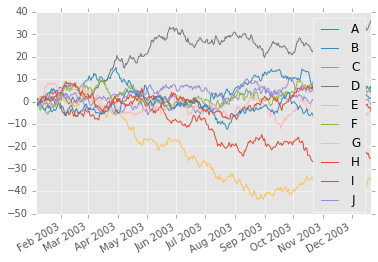

In [57]:
#lineas temporales de los 4 primeros meses
dftrain = pd.DataFrame(np.random.randn(350, 10), index=ts.index, columns=list('ABCDEFGHIJ'))
dftrain = dftrain.cumsum()
plt.figure();
dftrain.plot();

In [99]:
#APLICACIÓN DEL MODELO RANDOM FOREST

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
#Retorno una tupla
def datos_de_entrenamiento():
    # Datos de entrenamiento
    datos = pd.read_csv('/Users/mayteecheverry/Desktop/Crime/train.csv')
    #data = data.head(20000)

    X_entrenamiento = datos
    y_entrenamiento = datos["Category"]
    #De esta manera excluyo la categoría del entrenamiento
    X_entrenamiento = X_entrenamiento.drop("Category", axis=1)
    
    # elimino las columnas que no voy a utilizar en el entrenamineto
    X_entrenamiento = X_entrenamiento.drop("Descript", axis=1) 
    X_entrenamiento = X_entrenamiento.drop("Resolution", axis=1)
            
    return X_entrenamiento, y_entrenamiento

In [109]:
def datos_de_test():    
    # Datos de test o comprobación
    datos = pd.read_csv('/Users/mayteecheverry/Desktop/Crime/test.csv', index_col="Id")
    X_test = datos
    return X_test

In [110]:
def process_X(X_in):
    X = X_in
    
    # estructura categorica
    hours = pd.get_dummies(X.Dates.map(lambda x: pd.to_datetime(x).hour), prefix="hour")
    months = pd.get_dummies(X.Dates.map(lambda x: pd.to_datetime(x).month), prefix="month")
    years = pd.get_dummies(X.Dates.map(lambda x: pd.to_datetime(x).year), prefix="year")
    district = pd.get_dummies(X["PdDistrict"])
    day_of_week = pd.get_dummies(X["DayOfWeek"])
    
    # concateno los datos y asigno a X
    X = pd.concat([X, hours, months, years, district, day_of_week], axis=1)
    
    X = X.drop("PdDistrict", axis=1)
    X = X.drop("Address", axis=1)
    X = X.drop("Dates", axis=1)
    X = X.drop("DayOfWeek", axis=1)
    
    return X

In [111]:
def write_results(output):
    # save the result
    print output
    output.to_csv("/Users/mayteecheverry/Desktop/Crime/results.csv", index_label="Id")

In [118]:
def main():
    print('Caragando datos...')
    # cargo datos de entrenamiento
    X_train, y_train = datos_de_entrenamiento()
    
    # cargo datos test
    X_test = datos_de_test()
    
    # proceso X
    print("Procesando datos...")
    X_train = process_X(X_train)
    X_test = process_X(X_test)
        
    print("Ejecutando clasificador...")   
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train, y_train)
    
    print('Predictor...')
    y_test = pd.DataFrame(clf.predict_proba(X_test), index=X_test.index, columns=clf.classes_)
    
    print("Writing results to results.csv...")
    # guardar los resultados
    write_results(y_test)

In [119]:
if __name__ == '__main__':
    main()

Caragando datos...
Procesando datos...
Ejecutando clasificador...
Predictor...
Writing results to results.csv...
           ARSON   ASSAULT  BAD CHECKS  BRIBERY  BURGLARY  DISORDERLY CONDUCT  \
Id                                                                              
0       0.020000  0.101833      0.0000        0  0.021667            0.000000   
1       0.010000  0.050000      0.0000        0  0.000000            0.000000   
2       0.000000  0.160000      0.0000        0  0.036667            0.000000   
3       0.000000  0.060000      0.0000        0  0.000000            0.000000   
4       0.000000  0.060000      0.0000        0  0.000000            0.000000   
5       0.000000  0.123333      0.0000        0  0.040000            0.000000   
6       0.006667  0.056667      0.0000        0  0.055357            0.000000   
7       0.000000  0.090000      0.0000        0  0.000000            0.000000   
8       0.000000  0.052167      0.0000        0  0.030000            0.010000

In [127]:
import numpy as np
import seaborn as sns
#import ggplot
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

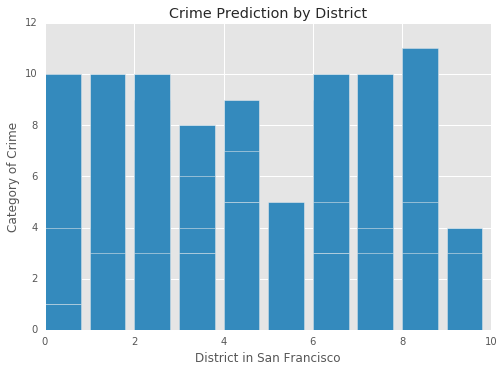

In [128]:
#From Kaggle competition - https://www.kaggle.com/c/sf-crime/data?test.csv.zip
#https://www.kaggle.com/c/digit-recognizer/forums/t/2299/getting-started-python-sample-code-random-forest

##################################### TASK #####################################
#Predicción de la categoría de crímenes ocurrídos en San Francisco
#################################################################################

#DATA SET - https://www.kaggle.com/c/sf-crime/data
dfTest = pd.read_csv('/Users/mayteecheverry/Desktop/Crime/test.csv', header = 0, nrows = 100)
dfTrain = pd.read_csv('/Users/mayteecheverry/Desktop/Crime/train.csv', header = 0, nrows = 100)

#Cleaning the data
#Drop columns that won't be used
dfTrain = dfTrain.drop(['Dates', 'DayOfWeek', 'Resolution', 'X','Y', 'Address','Descript'], axis = 1)
dfTest = dfTest.drop(['Dates', 'DayOfWeek','X','Y','Address'], axis = 1)

# convert string values to dummy variables
dfTrain['Category'] = pd.Categorical(dfTrain.Category).codes
dfTrain['PdDistrict'] = pd.Categorical(dfTrain.PdDistrict).codes
dfTest['PdDistrict'] = pd.Categorical(dfTest.PdDistrict).codes

#Making prediction of Crime by District using Random Forest ML Algorithm
rforest = RandomForestClassifier(n_estimators = 100)
training_set = dfTrain.ix[:,'Category':]
target = dfTrain['Category']
#Fit the district and the crime category
rforest = rforest.fit(training_set, target)
#Predict the district based on the crime
output = rforest.predict(dfTrain.ix[:,'Category':])
#Make the prediction readable
dfOut = pd.DataFrame(dfTest['PdDistrict'].values, columns = ['PdDistrict'])
dfOut['Category'] = output

#Visualization of the predicted model
plt.figure()
plt.title('Crime Prediction by District')
plt.ylabel('Category of Crime')
plt.xlabel('District in San Francisco')
plt.bar(dfOut['PdDistrict'], dfOut['Category'])
plt.show()

 - Start.
 -- Loaded data.
Training set has 878049 rows and 9 columns
 -- Start training Random Forest Classifier. Number of trees = 1
 -- Finished training.
  Calculate CV score
CV Score = 28.839636003
 -- Loaded data.
Training set has 878049 rows and 9 columns
 -- Start training Random Forest Classifier. Number of trees = 51
 -- Finished training.
  Calculate CV score
CV Score = 6.04821406027
 -- Loaded data.
Training set has 878049 rows and 9 columns
 -- Start training Random Forest Classifier. Number of trees = 101
 -- Finished training.
  Calculate CV score
CV Score = 4.79342102711
 -- Loaded data.
Training set has 878049 rows and 9 columns
 -- Start training Random Forest Classifier. Number of trees = 151
 -- Finished training.
  Calculate CV score
CV Score = 5.06274678503


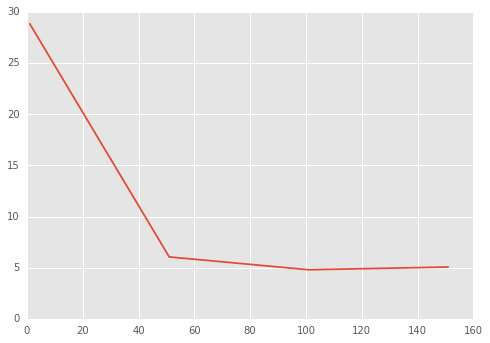

 - Finished.


In [130]:
import sys

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

np.random.seed(17411)

def logloss_mc(y_true, y_prob, epsilon=1e-15):
    """ Multiclass logloss
    This function is not officially provided by Kaggle, so there is no
    guarantee for its correctness.
    """
    # normalize
    y_prob = y_prob / y_prob.sum(axis=1).reshape(-1, 1)
    y_prob = np.maximum(epsilon, y_prob)
    y_prob = np.minimum(1 - epsilon, y_prob)
    # get probabilities

    y = [y_prob[i, j] for (i, j) in enumerate(y_true)]
    ll = - np.mean(np.log(y))
    return ll

def load_train_data(path=None, train_size=0.8):
    # The competition datafiles are in the directory ../input
    # Read competition data files:
    df = pd.read_csv("/Users/mayteecheverry/Desktop/Crime/train.csv")
    X = df.values.copy()
    np.random.shuffle(X)
    
    # Test training and validations sets
    # Note in this case training data has -
    # predictors: starting from second column to end
    # targets: column 2 (name Category)
    X_train, X_valid, y_train, y_valid = train_test_split(
        X[:, [3,4,6,7,8]], X[:, 1], train_size=train_size,
        )
    print(" -- Loaded data.")
    print("Training set has {0[0]} rows and {0[1]} columns".format(X.shape))

    return (X_train,X_valid,y_train,y_valid)

def load_test_data(path=None, train_size=0.8):
    # The competition datafiles are in the directory ../input
    # Read competition data files:
    df = pd.read_csv("/Users/mayteecheverry/Desktop/Crime/test.csv")
    X = df.values
    
    # X_test = X[:,2:]
    print("Test set has {0[0]} rows and {0[1]} columns".format(X.shape))

    #return X_test.astype
    # return X_test
    X_test, ids = X[:, 2:], X[:, 0]
    return X_test, ids.astype(str)

def train(n_estimators):
    X_train, X_valid, y_train, y_valid = load_train_data()

    #encode data (handle categorical data)
    encoder = LabelEncoder()
    for i in range(0,len(X_train[1,:])):
        X_train[:,i] = encoder.fit_transform(X_train[:,i])
        X_valid[:,i] = encoder.fit_transform(X_valid[:,i])

    # Setup classification trainer
    clf = RandomForestClassifier(n_estimators=n_estimators,n_jobs=4)

    # Start training
    print(" -- Start training Random Forest Classifier. Number of trees = "+str(n_estimators))
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_valid)
    print(" -- Finished training.")

    print("  Calculate CV score")
    # score = clf.score(X_valid,y_valid)

    y_true = encoder.fit_transform(y_valid)
    score = logloss_mc(y_true, y_prob)
    # assert (encoder.classes_ == clf.classes_).all()

    return clf, encoder, score

def make_submission(clf, encoder, path='/Users/mayteecheverry/Desktop/Crime/submission.csv'):
    X_test,ids = load_test_data()

    #encode data (handle categorical data)
    for i in range(0,len(X_test[1,:])):
        X_test[:,i] = encoder.fit_transform(X_test[:,i])

    # -- if one wishes to predict most possible outcome --
    # y_pred = clf.predict(X_test)

    # -- if one wishes to predict possibility of all possible outcomes --
    y_prob = clf.predict_proba(X_test)

    with open(path, 'w') as f:
        f.write("ID,")
        f.write(','.join(clf.classes_))
        f.write('\n')

        for id, probs in zip(ids, y_prob):
#            probas = ','.join([id] + list(map(str, probs.tolist())))
            probas = ','.join([id] + map(str,["%.2f" % elem for elem in list(map(float,probs.tolist()))]))
#            probas = ','.join(list(map(str, probs.tolist())))
            f.write(probas)
            f.write('\n')
    print(" -- Wrote submission to file {}.".format(path))

def main():
    print(" - Start.")

    CVscore=[]
    treenum=range(1,200,50)

    for n_estimators in treenum:
        clf,encoder,score = train(n_estimators)
        print("CV Score = "+str(score))
        CVscore.append(score)
        
    plt.plot(treenum,CVscore)
    plt.show()

    #n_estimators=100
    #clf,encoder,score = train(n_estimators)
    #print("CV Score = "+str(score))
    #make_submission(clf, encoder)
    
    # Write to the log:
    # print("Training set has {0[0]} rows and {0[1]} columns".format(X.shape))
    # print("Test set has {0[0]} rows and {0[1]} columns".format(test.shape))
    # Any files you write to the current directory get shown as outputs
    print(" - Finished.")

if __name__ == '__main__':
    main()